In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [67]:
df = pd.read_csv("Coca-Cola_stock_history.csv")
df.Date = pd.to_datetime(df.Date, dayfirst=True)
df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Converted Date
15306,2022-10-20 00:00:00-04:00,55.770000,55.919998,54.959999,55.080002,16905100,0.0,0,20/10/2022
15307,2022-10-21 00:00:00-04:00,55.000000,56.110001,54.990002,55.959999,15028000,0.0,0,21/10/2022
15308,2022-10-24 00:00:00-04:00,56.639999,57.730000,56.570000,57.570000,17416700,0.0,0,24/10/2022
15309,2022-10-25 00:00:00-04:00,59.040001,59.110001,57.750000,58.950001,28829900,0.0,0,25/10/2022
15310,2022-10-26 00:00:00-04:00,59.009998,59.779999,58.860001,59.389999,15831400,0.0,0,26/10/2022


In [68]:
df.shape

(15311, 9)

In [69]:
print(f"Date range of open stock prices available from {df.loc[:,'Converted Date'][0]} to {df.loc[:,'Converted Date'][len(df)-1]}")

Date range of open stock prices available from 02/01/1962 to 26/10/2022


In [65]:
df.drop(df.columns[[0]], axis = 1, inplace = True)

# Convert 'Converted Date' to datetime
df.rename(columns={'Converted Date': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Date'] = pd.date_range

# Set the index to 'Converted Date'
df.set_index('Date', inplace=True)

#Splitting data to training and testing sets
size = int(len(df)*0.8) #0.8 as 80%

#Setting the training set to the 80% former dates and the testing set to 20% latter dates
df_train = df.iloc[:size]
df_test = df.iloc[size:]

KeyError: 'Date'

In [60]:
df_train.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,12248.000000,12248.000000,12248.000000,12248.000000,1.224800e+04,12248.000000,12248.000000
mean,5.354481,5.407972,5.299785,5.356934,7.710205e+06,0.000731,0.001225
std,6.694888,6.762507,6.624964,6.697559,7.650831e+06,0.009215,0.051894
min,0.037154,0.037279,0.034890,0.037028,7.680000e+04,0.000000,0.000000
25%,0.216881,0.218894,0.215019,0.216877,1.939200e+06,0.000000,0.000000
50%,0.946541,0.962058,0.931440,0.951483,5.822100e+06,0.000000,0.000000
75%,12.565772,12.678188,12.459901,12.568986,1.070470e+07,0.000000,0.000000
max,23.231127,23.495305,23.165083,23.231127,1.241690e+08,0.220000,3.000000


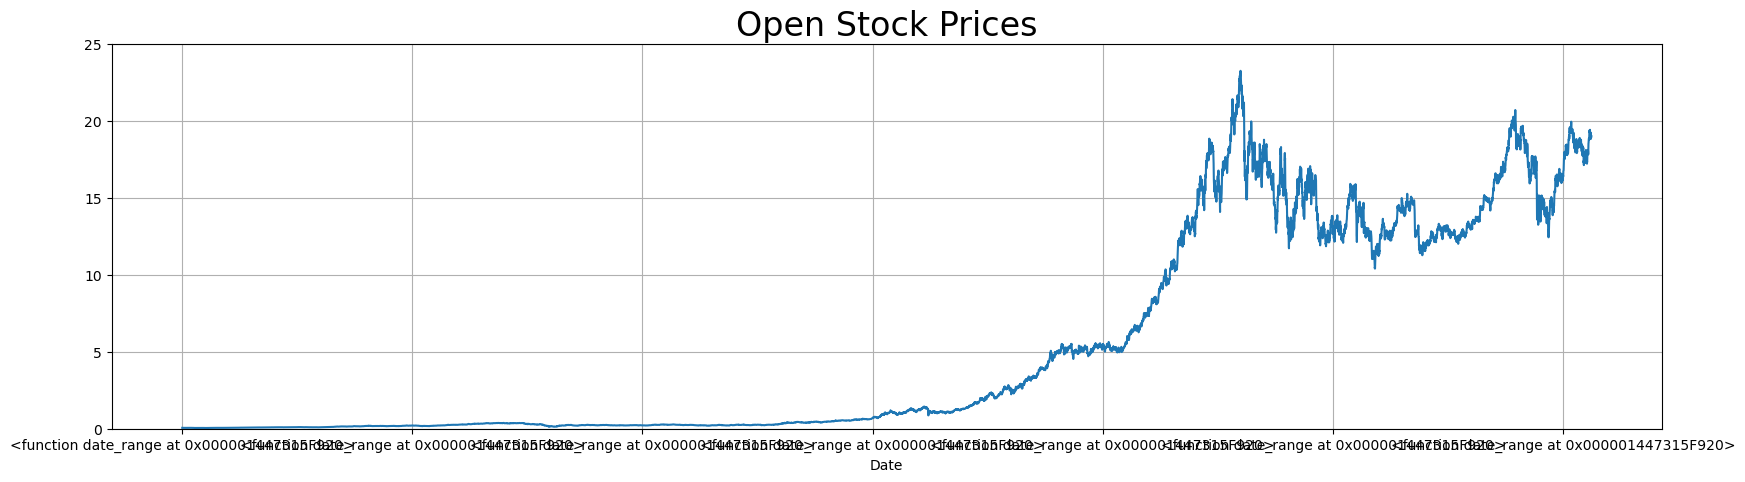

In [61]:
df_train.Open.plot(figsize=(20,5))
plt.title("Open Stock Prices", size=24)
plt.ylim(0,25)
plt.grid()

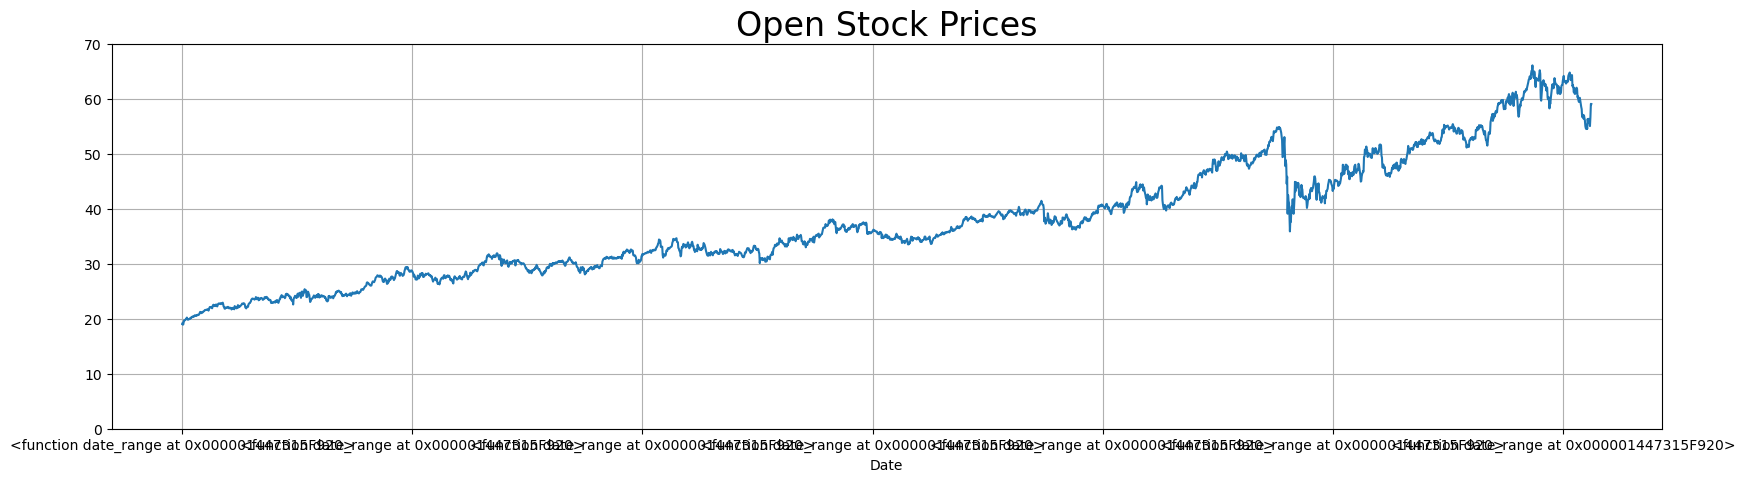

In [62]:
df_test.Open.plot(figsize=(20,5))
plt.title("Open Stock Prices", size=24)
plt.ylim(0,70)
plt.grid()

In [63]:
round(df.describe(),3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,15311.000,15311.000,15311.000,15311.000,1.531100e+04,15311.000,15311.000
mean,11.813,11.907,11.717,11.815,9.139213e+06,0.002,0.001
std,15.026,15.133,14.916,15.026,7.957947e+06,0.021,0.049
min,0.037,0.037,0.035,0.037,7.680000e+04,0.000,0.000
25%,0.238,0.240,0.236,0.238,2.889600e+06,0.000,0.000
50%,4.935,4.981,4.884,4.937,7.708800e+06,0.000,0.000
75%,17.384,17.613,17.168,17.415,1.307130e+07,0.000,0.000
max,66.038,66.235,64.776,65.259,1.241690e+08,0.440,3.000


AttributeError: 'Index' object has no attribute 'year'

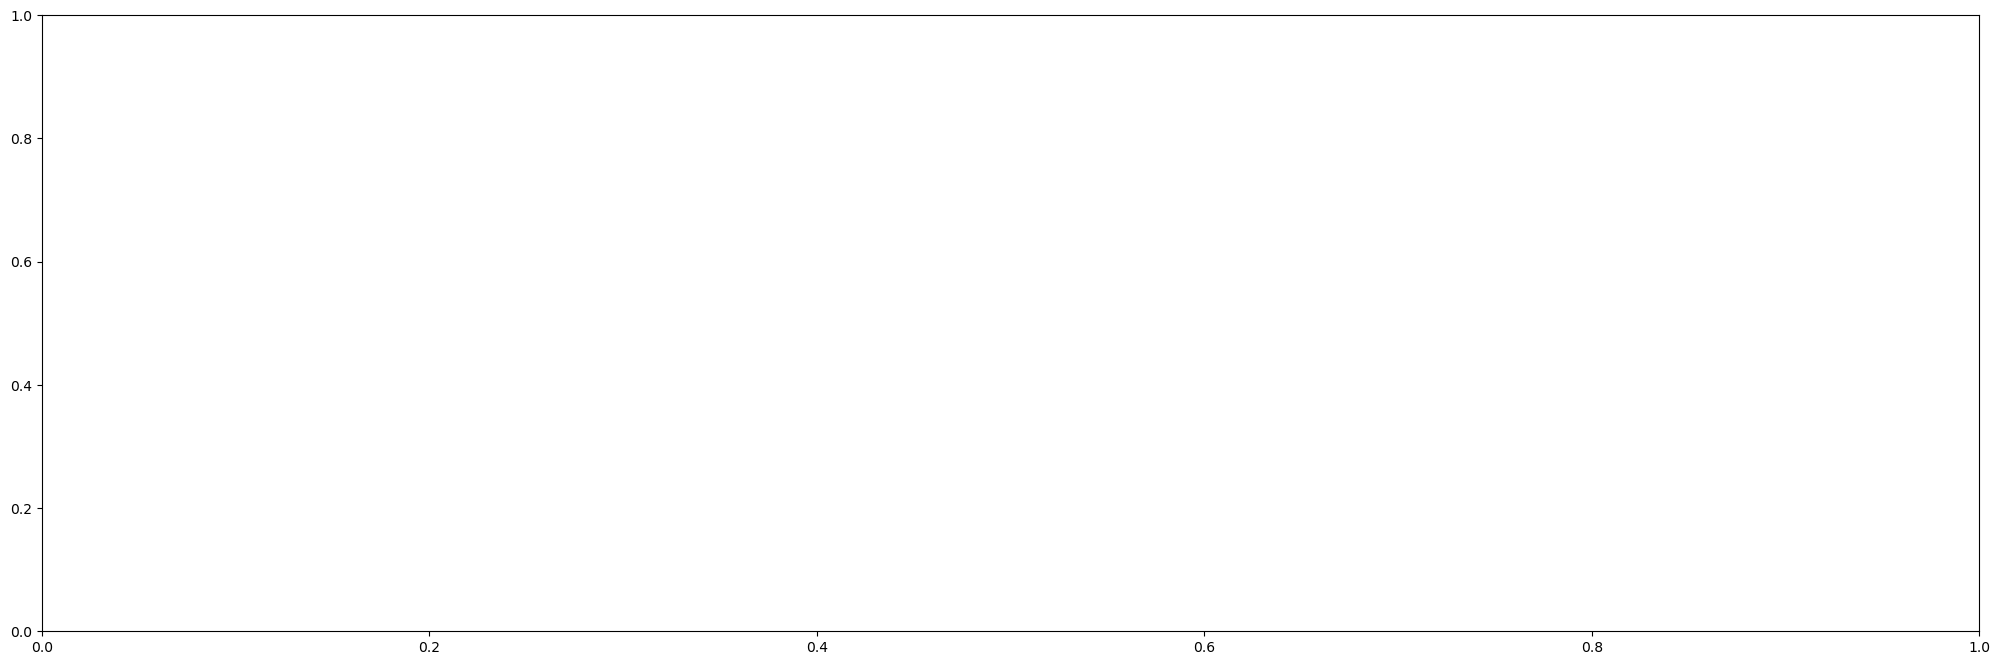

In [64]:
# Create the box plot
_, ax = plt.subplots(figsize=(25, 8))
sns.boxplot(x=df_train.index.year, y=df_train['Open'], ax=ax)
plt.title('Open Stock Prices from 1962 to 2010')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.grid()

In [ ]:
_, ax = plt.subplots(figsize=(25, 8))
sns.boxplot(x=df_test.index.year, y=df_test['Open'], ax=ax)
plt.title('Open Stock Prices from 2010 to 2022')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.grid()

In [ ]:
df_train_annual = df_train.resample('A').mean()
df_train_annual.plot()
plt.title("Average Open Stock Price per Year since 1962")
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid()

In [ ]:
df_test_annual = df_test.resample('A').mean()
df_test_annual.plot()
plt.title("Average Open Stock Price per Year since 2010")
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid()

In [ ]:
df_train_quarter = df_train.resample('Q').mean()
df_train_quarter.plot()
plt.title("Average Open Stock Price per Quarter since 1962")
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid()

In [ ]:
df_test_quarter = df_test.resample('Q').mean()
df_test_quarter.plot()
plt.title("Average Open Stock Price per Quarter since 2010")
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid()

In [ ]:
df_train_1 = df_train.groupby(df_train.index.year).mean().rename(columns={'Open':'Mean'})
df_train_1 = df_train_1.merge(df_train.groupby(df_train.index.year).std().rename(columns={'Open':'Std'}), left_index=True, right_index=True)
df_train_1['Cov_pct'] = ((df_train_1['Std']/df_train_1['Mean'])*100).round(2)

df_train_1.head()

In [ ]:
df_test_1 = df_test.groupby(df_test.index.year).mean().rename(columns={'Open':'Mean'})
df_test_1 = df_test_1.merge(df_test.groupby(df_test.index.year).std().rename(columns={'Open':'Std'}), left_index=True, right_index=True)
df_test_1['Cov_pct'] = ((df_test_1['Std']/df_test_1['Mean'])*100).round(2)

df_test_1.head()

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
df_train_1['Cov_pct'].plot()
plt.title("Average Open Stock Price Annually since 1962")
plt.xlabel('Year')
plt.ylabel('CV in %')
plt.grid()

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
df_test_1['Cov_pct'].plot()
plt.title("Average Open Stock Price Annually since 2010")
plt.xlabel('Year')
plt.ylabel('CV in %')
plt.grid()

In [ ]:
df_train["Open"].plot(figsize=(13,5), fontsize=15)
df_test["Open"].plot(figsize=(13,5), fontsize=15)
plt.grid()
plt.legend(['Training Data', 'Test Data'])
plt.show()

In [ ]:
train_time = [i+1 for i in range(len(df_train))]
test_time = [i+len(df_train)+1 for i in range(len(df_test))]

len(train_time), len(test_time)

In [ ]:
LR_train = df_train.copy()
LR_test = df_test.copy()

In [ ]:
LR_train['time'] = train_time
LR_test['time'] = test_time

In [ ]:
lr = LinearRegression()
lr.fit(LR_train[['time']],LR_train['Open'].values)

In [ ]:
test_predictions_model1 = lr.predict(LR_test[['time']])
LR_test['forecast'] = test_predictions_model1

plt.figure(figsize= (14,6))
plt.plot(df_train['Open'], label = 'train')
plt.plot(df_test['Open'], label = 'test')
plt.plot(LR_test['forecast'], label = 'reg on time_test data')
plt.legend(loc = 'best')
plt.grid()

In [ ]:
def mape(actual, pred): 
    return round((np.mean(abs(actual - pred)/ actual))*100, 2)

In [ ]:
mape_model1_test = mape(df_test['Open'].values, test_predictions_model1)
print("MAPE is %3.3f"%(mape_model1_test),"%")

In [ ]:
df_results = pd.DataFrame({'Test Mape (%)': [mape_model1_test]}, index=['RegressionOnTime'])
df_results

In [ ]:
naive_train = df_train.copy()
naive_test = df_test.copy()

In [ ]:
naive_test['naive'] = np.asarray(df_train['Open'])[len(np.asarray(df_train['Open']))-1]
naive_test['naive'].head()

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(naive_train['Open'], label='Train')
plt.plot(naive_test['Open'], label='Test')
plt.plot(naive_test['naive'], label='Naive Forecase on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [ ]:
mape_model2_test = mape(df_test['Open'].values, naive_test['naive'].values)
print("For Naive forecast on the Test Data, MAPE is %3.3f" %(mape_model2_test), "%")

In [ ]:
df_resultsDf_2 = pd.DataFrame({'Test MAPE (%)': [mape_model2_test]}, index = ['NaiveModel'])
df_results = pd.concat([df_results, df_resultsDf_2])
df_results

In [ ]:
final_model = ExponentialSmoothing(df, trend = 'additive').fit(smoothing_level = 0.7, smoothing_trend = 0.7)

In [ ]:
#print(df.isna().sum())


Mape_final_model = mape(df['Open'].values, final_model.fittedvalues)
print("MAPE:", Mape_final_model)


In [ ]:
prediction = final_model.forecast(steps=len(df_test))

In [ ]:
pred_df = pd.DataFrame({'lower_CI': prediction - 1.96*np.std(final_model.resid,ddof=1),
                       'prediction' : prediction,
                       'upper_CI' : prediction + 1.96*np.std(final_model.resid,ddof=1)})

pred_df.tail()

In [ ]:
axis = df.plot(label = 'Actual', figsize=(16,9))
pred_df['prediction'].plot(ax=axis, label = 'Forecast', alpha = .5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color = 'm', alpha = .15)
axis.set_xlabel('Year')
axis.set_xlabel('Stock Price')
plt.legend(loc = 'best')
plt.grid()
plt.show()